In [4]:
# import data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# import data
df = pd.read_csv('pop2000_2023.csv')


In [5]:
# drop the type, uri, track_href, and analysis_url columns
df = df.drop(['type', 'uri', 'track_href', 'analysis_url'], axis=1)
df.head()

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,100,2000,pop,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455,4
1,92,2000,pop,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,3OHfY25tqY28d16oZczHc8,153947,4
2,92,2000,pop,0.644,0.735,8,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947,4
3,90,2000,pop,0.684,0.607,11,-8.127,0,0.1000,0.0267,0.000307,0.1910,0.498,81.001,0JXXNGljqupsJaZsgSbMZV,195373,4
4,89,2000,pop,0.561,0.520,11,-9.342,0,0.2440,0.0503,0.000002,0.3550,0.424,153.150,1bDbXMyjaUIooNwFE9wn0N,239360,3


In [15]:
# Examining multicollinearity
# create a correlation matrix
pop = df[df['genre'] == 'pop']
# sns.scatterplot(data=pop, x='loudness', y='popularity')

X = pop[['danceability','energy','key','loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["predictor"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

           predictor         VIF
0              const  151.343842
1       danceability    1.474673
2             energy    3.418391
3                key    1.014327
4           loudness    2.362397
5               mode    1.027171
6        speechiness    1.030709
7       acousticness    1.874174
8   instrumentalness    1.083298
9           liveness    1.062475
10           valence    1.769846
11             tempo    1.058803


(72, 17)

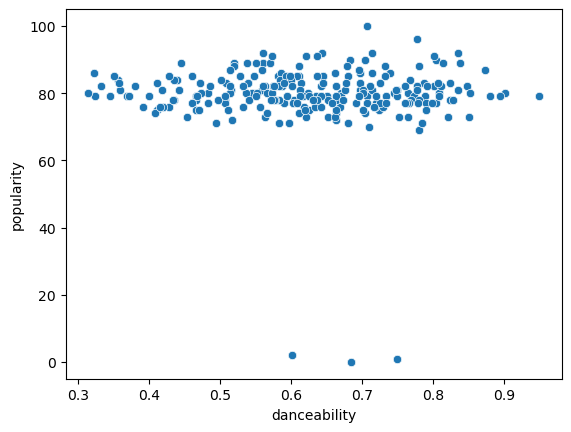

In [10]:
sns.scatterplot(data=df, x='danceability', y='popularity')
unpopular = df[df['popularity'] < 50]
unpopular.shape